# Comparing the effectiveness of ML-models for detecting credit card fraud

## Import libraries and read dataset

In this section all needed libraries are imported and the data set is read

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

2024-09-21 12:56:22.330607: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Read data set
df = pd.read_csv('creditcard.csv')

## Exploring the data

In this section exploratory data analysis is conducted to get an understanding of the data that will be used in the project.

On Kaggle where the data used has been fetched it is described that the dataset consists of PCA-transformed numerical features (V1-V28) for confidentiality, with only 'Time' and 'Amount' remaining untransformed from the original data.

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# The dataset has no null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# Data is very skewed with only 492 transactions classifed as frauds. This means that there is a risk of overfitting algorithms
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

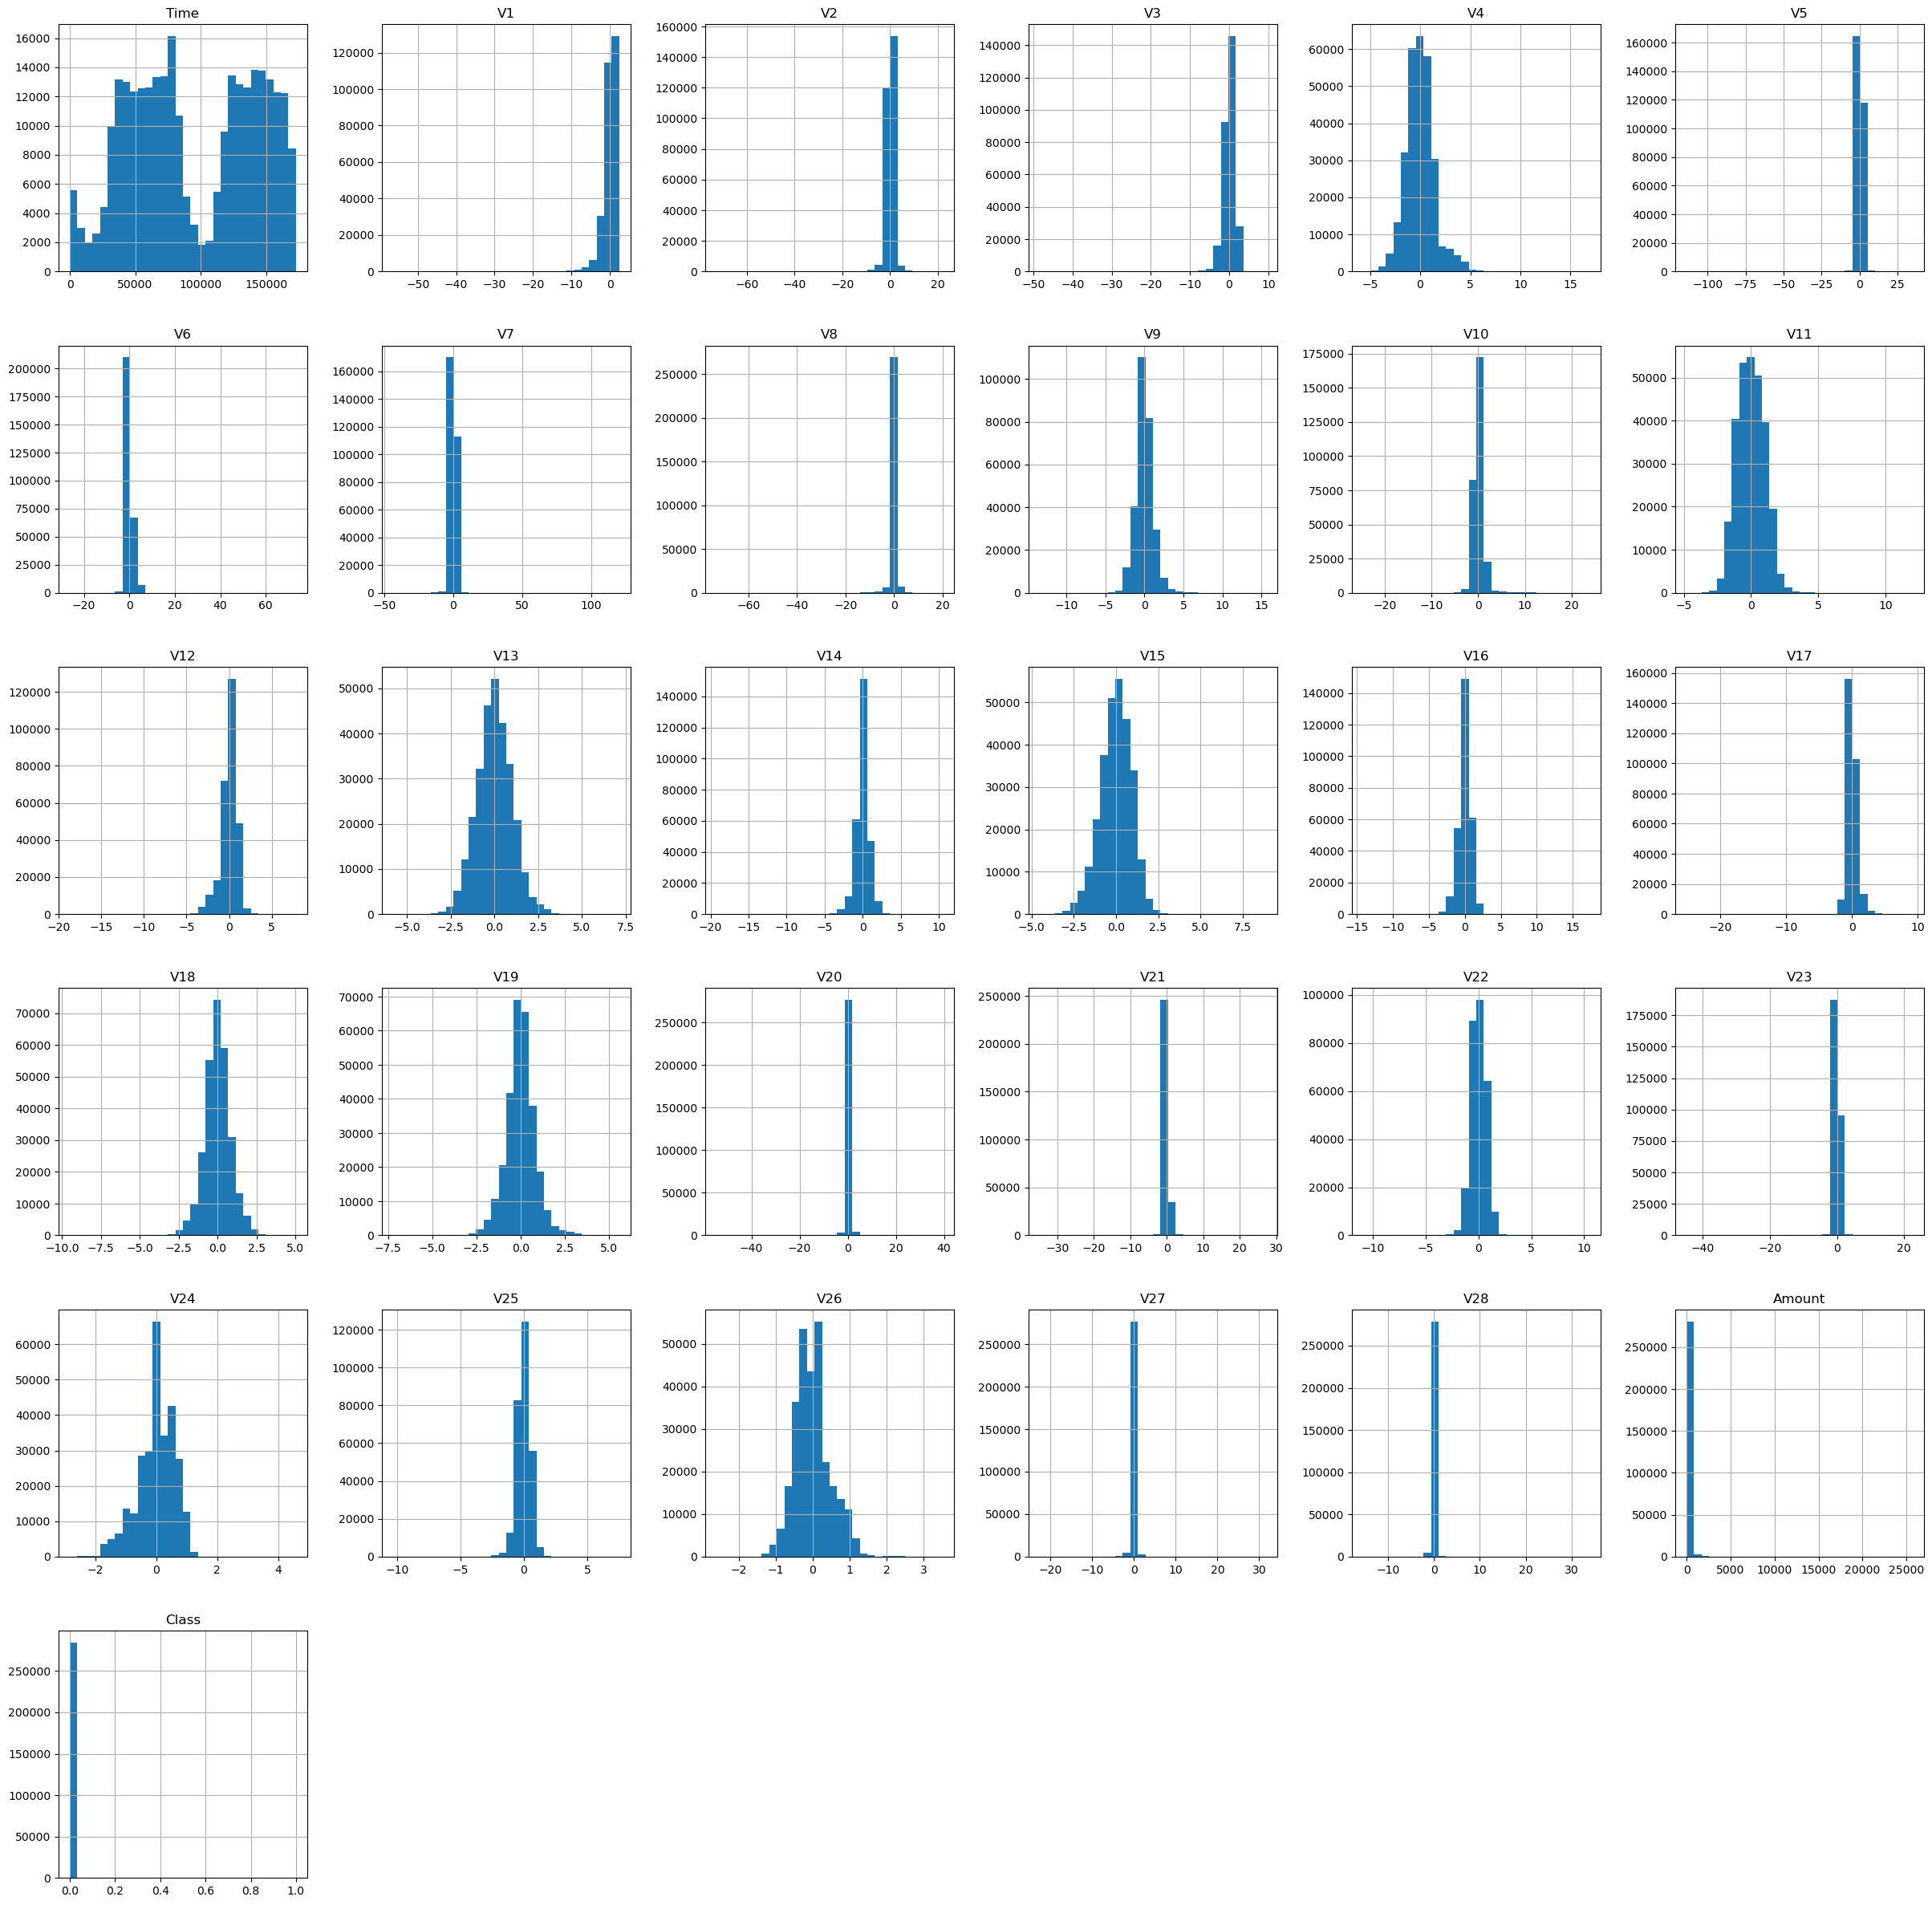

In [7]:
# The frequency of transactions vary depending on time of day, transaction amounts seem to be relatively low and the VX-columns all seem to be distributed around 0
df.hist(bins=30, figsize=(30,30))

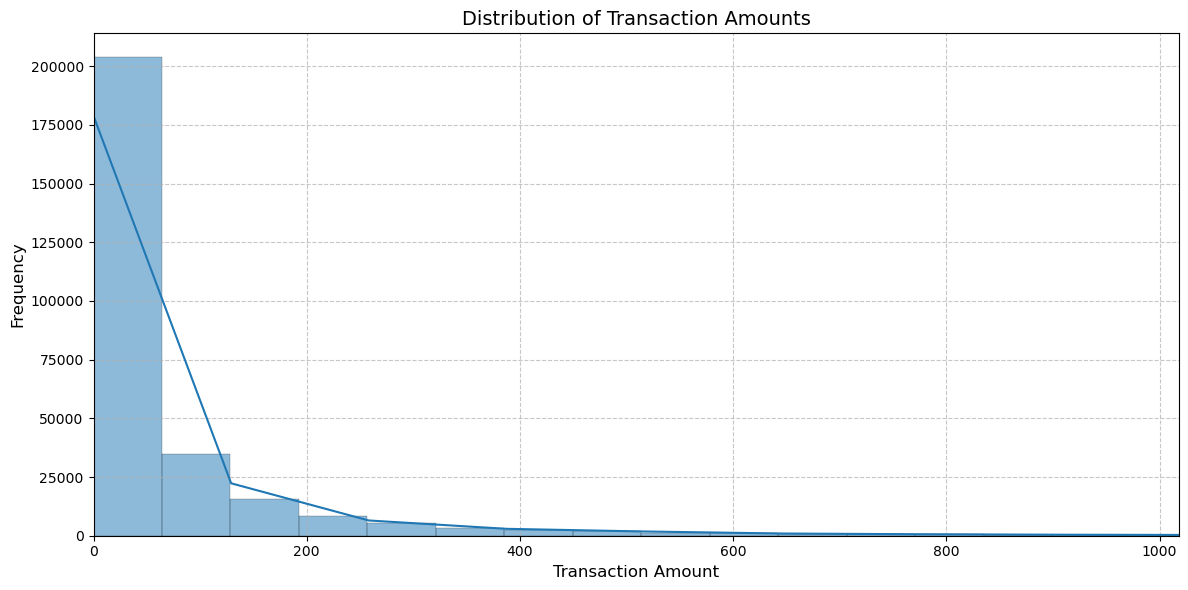

In [8]:
#Plot the distribution of amounts to see it more clearly
#Most transactions are of relatively low amounts
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=df, x='Amount', bins=400, kde=True, ax=ax)
ax.set_xlabel('Transaction Amount', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of Transaction Amounts', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)

# Adjust x-axis to show more detail for smaller transactions
ax.set_xlim(0, df['Amount'].quantile(0.99))
plt.tight_layout()

plt.savefig('Images/distribution_of_transaction_amounts.png', dpi=300)

plt.show()

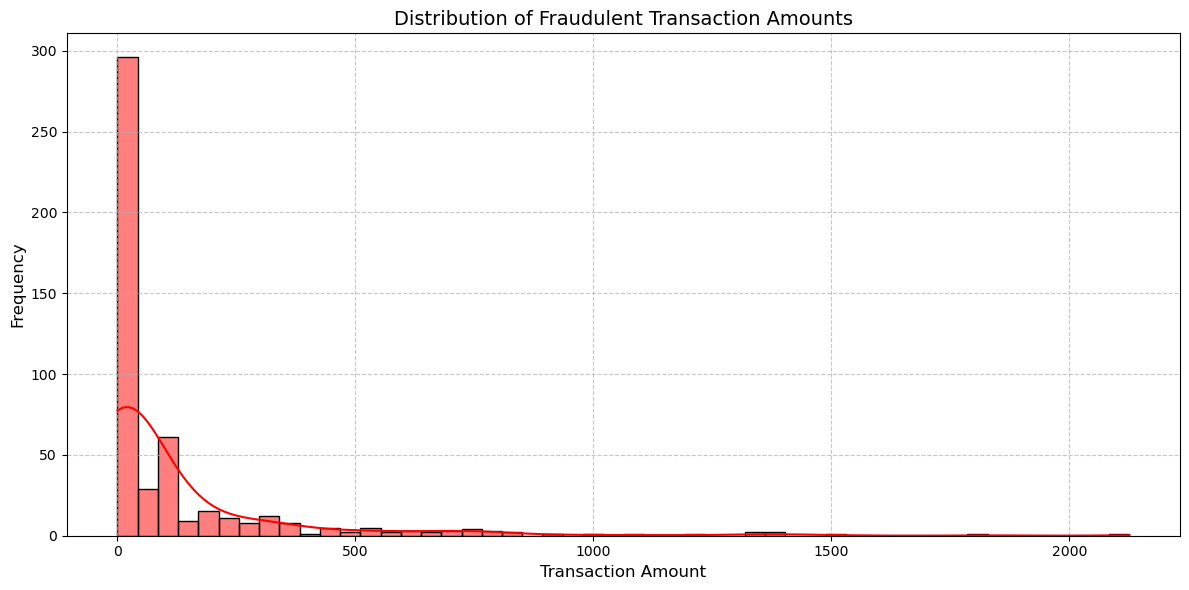

In [9]:
#Plot the distribution of amounts for fraudulent transactions
#As can be seen most fraudulent transactions are of relatively low amounts
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=df[df['Class'] == 1], x='Amount', bins=50, kde=True, ax=ax, color='red')
ax.set_xlabel('Transaction Amount', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of Fraudulent Transaction Amounts', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('Images/distribution_of_transaction_amounts_for_fraudulent.png', dpi=300)

plt.show()

## Data preprocessing

In this section the data is prepared for use in ML-algorithims

In [10]:
# Replace ammount and time columns with columns with scaled values. Robust scaler is used since it is less affected by outliers than alternatives

df[['Amount', 'Time']] = RobustScaler().fit_transform(df[['Amount', 'Time']])
print(df[['Amount', 'Time']].describe())
df.head()

              Amount           Time
count  284807.000000  284807.000000
mean        0.927124       0.118914
std         3.495006       0.557903
min        -0.307413      -0.994983
25%        -0.229162      -0.358210
50%         0.000000       0.000000
75%         0.770838       0.641790
max       358.683155       1.035022


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [11]:
# The data set is split into datasets for training, testing and validation two times, one based on all data and one where undersampling is used
# First all data is split

X = df.drop('Class', axis=1)
y = df['Class']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# Print the shapes of the resulting datasets
print("Full dataset shape:", df.shape)
print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

# Print class distribution in each set
print("\nClass distribution:")
print("Train set:", y_train.value_counts(normalize=True))
print("Validation set:", y_val.value_counts(normalize=True))
print("Test set:", y_test.value_counts(normalize=True))

# Print number of fradulent transactions in each set
print("\nNumber of fraudulent transactions:")
print("Train set:", y_train.sum())
print("Validation set:", y_val.sum())
print("Test set:", y_test.sum())

Full dataset shape: (284807, 31)
Train set shape: (170883, 30)
Validation set shape: (56962, 30)
Test set shape: (56962, 30)

Class distribution:
Train set: Class
0    0.998274
1    0.001726
Name: proportion, dtype: float64
Validation set: Class
0    0.998262
1    0.001738
Name: proportion, dtype: float64
Test set: Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64

Number of fraudulent transactions:
Train set: 295
Validation set: 99
Test set: 98


In [12]:
# Convert to NumPy arrays
X_train = X_train.to_numpy()
X_val = X_val.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

# Print the shapes of the resulting NumPy arrays
print("\nNumPy array shapes:")
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


NumPy array shapes:
Train set shape: (170883, 30) (170883,)
Validation set shape: (56962, 30) (56962,)
Test set shape: (56962, 30) (56962,)


In [13]:
# Second a new dataframe for a dataset where the number of fraud and non-fraud examples are balanced is created
frauds = df.query('Class == 1')
not_frauds = df.query('Class == 0')
balanced_df = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
print(balanced_df['Class'].value_counts())

Class
1    492
0    492
Name: count, dtype: int64


In [14]:
# Shuffle the data set
balanced_df = balanced_df.sample(frac = 1, random_state=1)
balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
189959,0.516160,-0.865285,-0.979506,2.587540,-2.781144,-0.887336,-0.579689,-0.976755,0.132058,-1.658263,...,-0.106978,-0.010528,-0.211955,0.021026,0.358237,-0.209483,0.062051,0.074730,-0.195626,0
107637,-0.166308,-2.271755,-0.457655,-2.589055,2.230778,-4.278983,0.388610,0.102485,0.813128,-1.092921,...,1.096342,0.658399,1.711676,0.333540,0.538591,-0.193529,0.258194,0.247269,11.218193,1
275992,0.964990,-2.027135,-1.131890,-1.135194,1.086963,-0.010547,0.423797,3.790880,-1.155595,-0.063434,...,-0.315105,0.575520,0.490842,0.756502,-0.142685,-0.602777,0.508712,-0.091646,8.555858,1
120862,-0.102269,0.531678,-1.108844,0.276972,0.386453,-1.038906,-0.810526,0.395582,-0.322635,0.068460,...,0.000589,-0.824566,-0.174821,0.479535,-0.094335,0.698329,-0.130716,0.083227,5.094669,0
207960,0.613447,1.878626,0.162765,-0.167433,3.465196,0.197332,1.157212,-0.676783,0.473890,-0.386278,...,-0.217428,-0.785738,0.406279,-0.056071,-0.560484,-0.388620,-0.012717,-0.038421,-0.223713,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236229,0.752241,-1.319844,0.290232,-0.223288,-0.351133,2.003048,0.004449,2.111141,-0.155835,-1.277863,...,0.259482,0.301030,-0.388021,-1.449786,1.720770,-0.282374,-0.106111,0.026727,2.379375,0
15810,-0.674820,-25.942434,14.601998,-27.368650,6.378395,-19.104033,-4.684806,-18.261393,17.052566,-3.742605,...,1.784316,-1.917759,-1.235787,0.161105,1.820378,-0.219359,1.388786,0.406810,1.089779,1
1569,-0.980557,-0.693097,0.720897,0.487926,1.545283,-0.123343,0.151906,1.821822,-0.176592,-1.514396,...,0.200782,0.193611,0.288196,-0.081502,0.281742,-0.136080,0.050083,0.147487,3.604136,0
107067,-0.169433,-1.512516,1.133139,-1.601052,2.813401,-2.664503,-0.310371,-1.520895,0.852996,-1.496495,...,0.729828,0.485286,0.567005,0.323586,0.040871,0.825814,0.414482,0.267265,4.137637,1


In [15]:
# Split the balanced data set into data sets for training, testing and validation

Xb = balanced_df.drop('Class', axis=1)
yb = balanced_df['Class']

Xb_train_val, Xb_test, yb_train_val, yb_test = train_test_split(Xb, yb, test_size=0.2, random_state=123, stratify=yb)
Xb_train, Xb_val, yb_train, yb_val = train_test_split(Xb_train_val, yb_train_val, test_size=0.25, random_state=123, stratify=yb_train_val)

# Print the shapes of the resulting datasets
print("Full dataset shape:", balanced_df.shape)
print("Train set shape:", Xb_train.shape)
print("Validation set shape:", Xb_val.shape)
print("Test set shape:", Xb_test.shape)

# Print class distribution in each set
print("\nClass distribution:")
print("Train set:", yb_train.value_counts(normalize=True))
print("Validation set:", yb_val.value_counts(normalize=True))
print("Test set:", yb_test.value_counts(normalize=True))

# Print number of fradulent transactions in each set
print("\nNumber of fraudulent transactions:")
print("Train set:", yb_train.sum())
print("Validation set:", yb_val.sum())
print("Test set:", yb_test.sum())

Full dataset shape: (984, 31)
Train set shape: (590, 30)
Validation set shape: (197, 30)
Test set shape: (197, 30)

Class distribution:
Train set: Class
0    0.5
1    0.5
Name: proportion, dtype: float64
Validation set: Class
1    0.502538
0    0.497462
Name: proportion, dtype: float64
Test set: Class
0    0.502538
1    0.497462
Name: proportion, dtype: float64

Number of fraudulent transactions:
Train set: 295
Validation set: 99
Test set: 98


In [16]:
# Convert to NumPy arrays
Xb_train = Xb_train.to_numpy()
Xb_val = Xb_val.to_numpy()
Xb_test = Xb_test.to_numpy()
yb_train = yb_train.to_numpy()
yb_val = yb_val.to_numpy()
yb_test = yb_test.to_numpy()

# Print the shapes of the resulting NumPy arrays
print("\nNumPy array shapes:")
print("Train set shape:", Xb_train.shape, yb_train.shape)
print("Validation set shape:", Xb_val.shape, yb_val.shape)
print("Test set shape:", Xb_test.shape, yb_test.shape)


NumPy array shapes:
Train set shape: (590, 30) (590,)
Validation set shape: (197, 30) (197,)
Test set shape: (197, 30) (197,)


## Applying ML-models

In this section five different ML-models are trained using both the unbalanced and balanced data sets

In [17]:
# A function is defined to extract performance metrics from a classification reports for each of the models that will be tested
def get_report_metrics(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, target_names=['Not Fraud', 'Fraud'], output_dict=True)
    return {
        'Model': model_name,
        'Accuracy': report['accuracy'],
        'Precision (Not Fraud)': report['Not Fraud']['precision'],
        'Recall (Not Fraud)': report['Not Fraud']['recall'],
        'F1-score (Not Fraud)': report['Not Fraud']['f1-score'],
        'Precision (Fraud)': report['Fraud']['precision'],
        'Recall (Fraud)': report['Fraud']['recall'],
        'F1-score (Fraud)': report['Fraud']['f1-score']
    }

# List to store results
results = []

### Logistic Regression

#### All data

In [18]:
# First a model is created and fitted using all of the data
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
# Altough the accuracy is high, this is due to the dataset beeing imbalanced. 
# The recall columns shows fraudulent transactions that were not classifed as frauds. Meaning that we got a poor performance of the model 
print(classification_report(y_val, logistic_model.predict(X_val), target_names = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56863
       Fraud       0.82      0.51      0.62        99

    accuracy                           1.00     56962
   macro avg       0.91      0.75      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [20]:
# Save results of model used on the test data set
results.append(get_report_metrics(y_test, logistic_model.predict(X_test), "Logistic Regression"))

#### Balanced data

In [21]:
# Second a model is created and fitted using the balanced data set
logistic_model_balanced = LogisticRegression()
logistic_model_balanced.fit(Xb_train, yb_train)

LogisticRegression()

In [22]:
print(classification_report(yb_val, logistic_model_balanced.predict(Xb_val), target_names = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.90      0.96      0.93        98
       Fraud       0.96      0.89      0.92        99

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



In [23]:
# Compare with the unbalanced data set
print(classification_report(y_test, logistic_model_balanced.predict(X_test), target_names = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.95      0.97     56864
       Fraud       0.03      0.92      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.95      0.97     56962



In [24]:
results.append(get_report_metrics(y_test, logistic_model_balanced.predict(X_test), "Balanced Logistic Regression"))

### Neural Network

#### All data

In [25]:
# Create the neural network
nn_model = Sequential([
    InputLayer(input_shape=(X_train.shape[1],)),
    Dense(units=2, activation='relu', name='hidden_layer'),
    BatchNormalization(name='batch_norm'),
    Dense(units=1, activation='sigmoid', name='output_layer')
])

nn_model_checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
)

nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 2)                 62        
                                                                 
 batch_norm (BatchNormalizat  (None, 2)                8         
 ion)                                                            
                                                                 
 output_layer (Dense)        (None, 1)                 3         
                                                                 
Total params: 73
Trainable params: 69
Non-trainable params: 4
_________________________________________________________________


In [26]:
# Train the model
nn_model.fit(X_train, y_train, 
          validation_data=(X_val, y_val), 
          epochs=5, 
          callbacks=[nn_model_checkpoint])

Epoch 1/5
5341/5341 [==============================] - 13s 2ms/step - loss: 0.0746 - accuracy: 0.9823 - val_loss: 0.0067 - val_accuracy: 0.9992
Epoch 2/5
5341/5341 [==============================] - 11s 2ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0074 - val_accuracy: 0.9993
Epoch 3/5
5341/5341 [==============================] - 12s 2ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0088 - val_accuracy: 0.9993
Epoch 4/5
5341/5341 [==============================] - 12s 2ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0081 - val_accuracy: 0.9993
Epoch 5/5
5341/5341 [==============================] - 12s 2ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0079 - val_accuracy: 0.9993


In [27]:
# Create a function for testing nn-models
def nn_prediction(model, X):
    return (model.predict(X).flatten() > 0.5).astype(int)

nn_prediction(nn_model, X_val)

1781/1781 [==============================] - 2s 1ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [28]:
print(classification_report(y_val, nn_prediction(nn_model, X_val), target_names = ['Not Fraud', 'Fraud']))

1781/1781 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56863
       Fraud       0.84      0.75      0.79        99

    accuracy                           1.00     56962
   macro avg       0.92      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [29]:
results.append(get_report_metrics(y_test, nn_prediction(nn_model, X_test), "Neural Network"))

1781/1781 [==============================] - 2s 1ms/step


#### Balanced data

In [30]:
# Create the neural network
nn_model_balanced = Sequential([
    InputLayer(input_shape=(Xb_train.shape[1],)),
    Dense(units=2, activation='relu', name='hidden_layer'),
    BatchNormalization(name='batch_norm'),
    Dense(units=1, activation='sigmoid', name='output_layer')
])

nn_model_balanced_checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
)

nn_model_balanced.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

nn_model_balanced.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 2)                 62        
                                                                 
 batch_norm (BatchNormalizat  (None, 2)                8         
 ion)                                                            
                                                                 
 output_layer (Dense)        (None, 1)                 3         
                                                                 
Total params: 73
Trainable params: 69
Non-trainable params: 4
_________________________________________________________________


In [31]:
# Train the model
nn_model_balanced.fit(Xb_train, yb_train, 
          validation_data=(Xb_val, yb_val), 
          epochs=50, 
          callbacks=[nn_model_balanced_checkpoint])

Epoch 1/50
19/19 [==============================] - 1s 14ms/step - loss: 0.7271 - accuracy: 0.4153 - val_loss: 0.7170 - val_accuracy: 0.6802
Epoch 2/50
19/19 [==============================] - 0s 5ms/step - loss: 0.6773 - accuracy: 0.5542 - val_loss: 0.6817 - val_accuracy: 0.5279
Epoch 3/50
19/19 [==============================] - 0s 6ms/step - loss: 0.6266 - accuracy: 0.6068 - val_loss: 0.6332 - val_accuracy: 0.6294
Epoch 4/50
19/19 [==============================] - 0s 6ms/step - loss: 0.5832 - accuracy: 0.7169 - val_loss: 0.5915 - val_accuracy: 0.6599
Epoch 5/50
19/19 [==============================] - 0s 6ms/step - loss: 0.5603 - accuracy: 0.7475 - val_loss: 0.5665 - val_accuracy: 0.7107
Epoch 6/50
19/19 [==============================] - 0s 7ms/step - loss: 0.5472 - accuracy: 0.7949 - val_loss: 0.5507 - val_accuracy: 0.7310
Epoch 7/50
19/19 [==============================] - 0s 8ms/step - loss: 0.5250 - accuracy: 0.8000 - val_loss: 0.5395 - val_accuracy: 0.7462
Epoch 8/50
19/19 [=

In [32]:
print(classification_report(yb_val, nn_prediction(nn_model_balanced, Xb_val), target_names = ['Not Fraud', 'Fraud']))

7/7 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

   Not Fraud       0.91      0.93      0.92        98
       Fraud       0.93      0.91      0.92        99

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



In [33]:
# Looking at the epocs when fitting the model there are indications that the model might be overfitted. Another model with only 1 ReLU is also created
nn_model_balanced_one = Sequential([
    InputLayer(input_shape=(Xb_train.shape[1],)),
    Dense(units=1, activation='relu', name='hidden_layer'),
    BatchNormalization(name='batch_norm'),
    Dense(units=1, activation='sigmoid', name='output_layer')
])

nn_model_balanced_one_checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
)

nn_model_balanced_one.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

nn_model_balanced_one.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 1)                 31        
                                                                 
 batch_norm (BatchNormalizat  (None, 1)                4         
 ion)                                                            
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 37
Trainable params: 35
Non-trainable params: 2
_________________________________________________________________


In [34]:
# Train the model
nn_model_balanced_one.fit(Xb_train, yb_train, 
          validation_data=(Xb_val, yb_val), 
          epochs=50, 
          callbacks=[nn_model_balanced_one_checkpoint])

Epoch 1/50
19/19 [==============================] - 1s 14ms/step - loss: 0.6502 - accuracy: 0.6424 - val_loss: 0.6375 - val_accuracy: 0.6650
Epoch 2/50
19/19 [==============================] - 0s 6ms/step - loss: 0.6269 - accuracy: 0.6627 - val_loss: 0.6277 - val_accuracy: 0.6802
Epoch 3/50
19/19 [==============================] - 0s 6ms/step - loss: 0.6142 - accuracy: 0.6780 - val_loss: 0.6217 - val_accuracy: 0.6954
Epoch 4/50
19/19 [==============================] - 0s 6ms/step - loss: 0.6027 - accuracy: 0.6864 - val_loss: 0.6163 - val_accuracy: 0.6853
Epoch 5/50
19/19 [==============================] - 0s 4ms/step - loss: 0.5837 - accuracy: 0.7051 - val_loss: 0.6119 - val_accuracy: 0.6904
Epoch 6/50
19/19 [==============================] - 0s 4ms/step - loss: 0.5828 - accuracy: 0.7186 - val_loss: 0.6082 - val_accuracy: 0.6904
Epoch 7/50
19/19 [==============================] - 0s 6ms/step - loss: 0.5787 - accuracy: 0.7068 - val_loss: 0.6051 - val_accuracy: 0.6954
Epoch 8/50
19/19 [=

In [35]:
# The performance metrics of using this nn compared to the previous are almost identical
print(classification_report(yb_val, nn_prediction(nn_model_balanced_one, Xb_val), target_names = ['Not Fraud', 'Fraud']))

7/7 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

   Not Fraud       0.92      0.89      0.90        98
       Fraud       0.89      0.92      0.91        99

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197



In [36]:
results.append(get_report_metrics(y_test, nn_prediction(nn_model_balanced, X_test), "Balanced Neural Network"))

1781/1781 [==============================] - 2s 1ms/step


### Random Forest

#### All data

In [37]:
# Create and train Random Forest Model
rf = RandomForestClassifier(max_depth = 2, n_jobs = -1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_jobs=-1)

In [38]:
#The metrics of this model is almost the same as with one 
print(classification_report(y_val, rf.predict(X_val), target_names = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56863
       Fraud       0.84      0.46      0.60        99

    accuracy                           1.00     56962
   macro avg       0.92      0.73      0.80     56962
weighted avg       1.00      1.00      1.00     56962



In [39]:
results.append(get_report_metrics(y_test, rf.predict(X_test), "Random Forest"))

#### Balanced data

In [40]:
rf_balanced = RandomForestClassifier(max_depth = 2, n_jobs = -1)
rf_balanced.fit(Xb_train, yb_train)

RandomForestClassifier(max_depth=2, n_jobs=-1)

In [41]:
# Great precision for fraud
print(classification_report(yb_val, rf_balanced.predict(Xb_val), target_names = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.84      1.00      0.91        98
       Fraud       1.00      0.81      0.89        99

    accuracy                           0.90       197
   macro avg       0.92      0.90      0.90       197
weighted avg       0.92      0.90      0.90       197



In [42]:
results.append(get_report_metrics(y_test, rf_balanced.predict(X_test), "Balanced Random Forest"))

### Gradient boosting model

#### All data

In [43]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=50,
                           random_state=0)

In [44]:
print(classification_report(y_val, gbc.predict(X_val), target_names = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56863
       Fraud       0.75      0.55      0.63        99

    accuracy                           1.00     56962
   macro avg       0.87      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962



In [45]:
results.append(get_report_metrics(y_test, gbc.predict(X_test), "Gradient Boosting Classifier"))

#### Balanced data

In [46]:
gbc_balanced = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2, random_state=0)
gbc_balanced.fit(Xb_train, yb_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=2, random_state=0)

In [47]:
print(classification_report(yb_val, gbc_balanced.predict(Xb_val), target_names = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.88      0.94      0.91        98
       Fraud       0.93      0.87      0.90        99

    accuracy                           0.90       197
   macro avg       0.91      0.90      0.90       197
weighted avg       0.91      0.90      0.90       197



In [48]:
results.append(get_report_metrics(y_test, gbc_balanced.predict(X_test), "Balanced Gradient Boosting Classifier"))

### Support Vector Machine

#### All data

In [49]:
svc = LinearSVC(class_weight='balanced', dual='auto')
svc.fit(X_train, y_train)

LinearSVC(class_weight='balanced', dual='auto')

In [50]:
print(classification_report(y_val, svc.predict(X_val), target_names = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     56863
       Fraud       0.07      0.88      0.13        99

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [51]:
results.append(get_report_metrics(y_test, svc.predict(X_test), "Support Vector Machine"))

#### Balanced data

In [52]:
svc_balanced = LinearSVC(class_weight='balanced', dual='auto')
svc_balanced.fit(Xb_train, yb_train)

LinearSVC(class_weight='balanced', dual='auto')

In [53]:
print(classification_report(yb_val, svc_balanced.predict(Xb_val), target_names = ['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.90      0.93      0.91        98
       Fraud       0.93      0.90      0.91        99

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



In [54]:
results.append(get_report_metrics(y_test, svc_balanced.predict(X_test), "Balanced Support Vector Machine"))

### Comparison and conclusions

In this section the performance of the models are compared

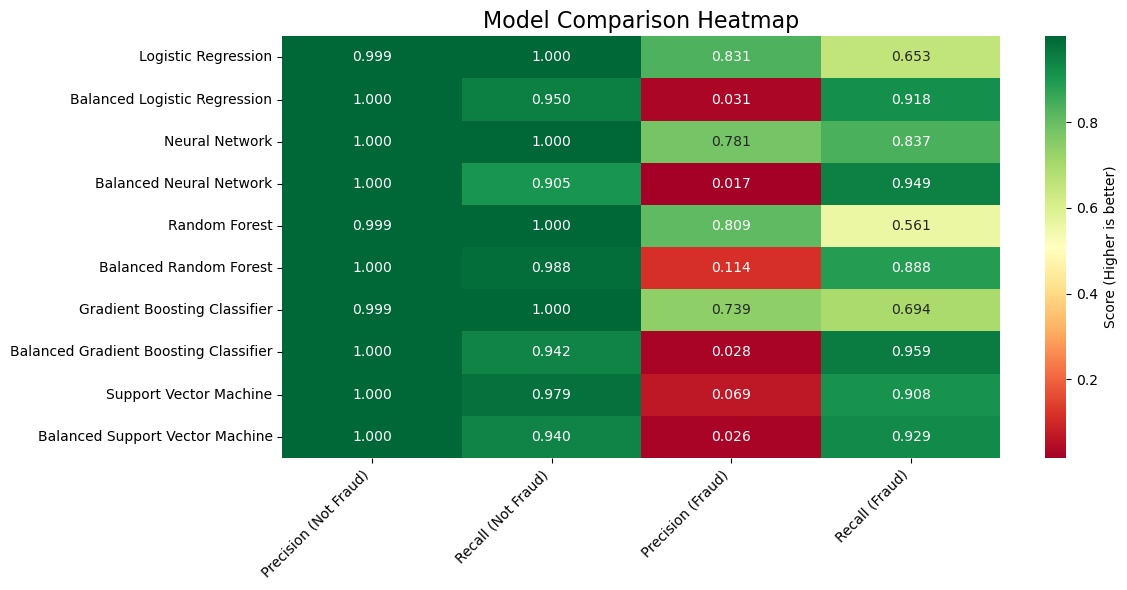

In [55]:
# A heatmap matrix is created to compare the performance metrics of all the models
comparison_df = pd.DataFrame(results)
comparison_df.set_index('Model', inplace=True)

selected_columns = ['Precision (Not Fraud)', 'Recall (Not Fraud)', 'Precision (Fraud)', 'Recall (Fraud)']
df_selected = comparison_df[selected_columns]

plt.figure(figsize=(12, 6))
ax = sns.heatmap(df_selected, annot=True, cmap='RdYlGn', fmt='.3f', cbar_kws={'label': 'Score (Higher is better)'})
plt.title('Model Comparison Heatmap', fontsize=16)
ax.set_ylabel('')
ax.set_xlabel('')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.savefig('Images/model_comparison_heatmap.png', dpi=300)

plt.show()

An effective fraud detection algorithm needs to balance two factors:
1. Minimizing false negatives (missed frauds), represented by high Recall (Fraud)
2. Minimizing false positives (legitimate transactions flagged as fraud), indicated by high Precision (Fraud)

Based on these criteria, the Non-balanced Neural Network model stands seems to be the best performer. It achieves a Precision (Fraud) of 0.804 and a Recall (Fraud) of 0.796. This model therefore successfully identifies a high proportion of fraudulent transactions (79.6%) while maintaining a low false positive rate (only 19.6% of its fraud predictions are incorrect). It also performs well in identifying non-fraudulent transactions, with perfect scores for both Precision and Recall (Not Fraud) meaning that it doesn't compromise the customer experience for legitimate transactions.

While balanced models show higher Recall (Fraud) in general, they suffer from extremely low Precision (Fraud), which would lead to an unacceptable number of false alarms.

**In conclusion, the Non-balanced Neural Network model should likely be selected. However, to validate this more information about the business implications of detecting fraudulent transactions against the cost of investigating false positives is needed.**

The next steps of this project are to tune the algorithms more, for instance to avoid overfitting the algorithms trained on balanced data, and try other methods for splitting the data, for example SMOTE